<big><h1 align=center> Independent Component Analysis </h1></big>
<h1 align=center style=color:lightgreen> For Audio Clips </h1>

In this notebook, we'll use Independent Component Analysis to **retrieve original signals** from three observations each of which contains a **different mix of the original signals**.

## Table of Content
1. What is Independent Component Analysis?
2. Applications
2. Our Goal
3. Dataset
4. Visualizing Audio Files
5. Listening Audio
6. Applying FastICA
7. Results

# What is Independent Component Analysis?

<big>**Independent component analysis (ICA) is a statistical and computational technique for revealing hidden factors that underlie sets of random variables, measurements, or signals.**<br><br>

ICA defines a generative model for the observed multivariate data, which is typically given as a large database of samples. In the model, the data variables are assumed to be linear mixtures of some unknown latent variables, and the mixing system is also unknown. The latent variables are assumed nongaussian and mutually independent, and they are called the independent components of the observed data. These independent components, also called sources or factors, can be found by ICA.<br><br>

ICA is superficially related to principal component analysis and factor analysis. ICA is a much more powerful technique, however, capable of finding the underlying factors or sources when these classic methods fail completely. </big><br><br>

[SOURCE](https://www.cs.helsinki.fi/u/ahyvarin/whatisica.shtml)

# Applications

ICA can be extended to analyze non-physical signals. For instance, ICA has been applied to discover discussion topics on a bag of news list archives.

Some ICA applications are listed below:

* Optical Imaging of neurons
* Neuronal spike sorting
* Face recognition
* Modelling receptive fields of primary visual neurons
* Predicting stock market prices
* Mobile phone communications 
* Colour based detection of the ripeness of tomatoes
* Removing artifacts, such as eye blinks, from EEG data.
* Analysis of changes in gene expression over time in single cell RNA-sequencing experiments.
* Studies of the resting state network of the brain.

[SOURCE](https://en.wikipedia.org/wiki/Independent_component_analysis)

# Our Goal

<img src="https://team.inria.fr/parietal/files/2018/07/ica_principle.png"></img>

# Dataset

Let's begin by looking at the dataset we have. We have **three WAVE files, each of which is a mix**, as I've mentioned. If you haven't worked with audio files in python before, that's okay, they basically boil down to being lists of floats.

In [1]:
from pydub import AudioSegment
import IPython
import numpy as np
import wave

my_directory = '/Users/bassel_instructor/Documents/datasets/'
mix_1_wave = wave.open(my_directory+'ICA mix 1.wav','r')

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pydub/utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


Let's peak at the parameters of the wave file to learn more about it

In [2]:
mix_1_wave.getparams()

_wave_params(nchannels=1, sampwidth=2, framerate=44100, nframes=264515, comptype='NONE', compname='not compressed')

* So this file has only channel which means it's mono sound.
* It has a frame rate of 44100, which means each second of sound is represented by 44100 integers (integers because the file is in the common PCM 16-bit format).
* The file has a total of 264515 integers/frames, which means its length in seconds is:

In [3]:
264515/44100

5.998072562358277

Let's extract the frames of the wave file, which will be a part of the dataset we'll run ICA against:

In [4]:
# Extract Raw Audio from Wav File
signal_1_raw = mix_1_wave.readframes(-1)
signal_1 = np.frombuffer(signal_1_raw, 'int16')

/var/folders/3x/ds4ljhhn611fn_glg6pp102h0000gq/T/ipykernel_5517/3558001678.py:3: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  signal_1 = np.fromstring(signal_1_raw, 'int16')


signal_1 is now a list of ints representing the sound contained in the first file.

In [5]:
'length: ', len(signal_1) , 'first 20 elements: ',signal_1[:20]

('length: ',
 264515,
 'first 20 elements: ',
 array([ 879, 1268, 1460, 1756, 1943, 2216, 2407, 2668, 2866, 3106, 3308,
        3546, 3752, 3981, 4175, 4395, 4588, 4790, 4966, 5146], dtype=int16))

# Visualizing Audio Files

If we plot this array as a line graph, we'll get the familiar wave form representation:

In [6]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')

In [22]:
len(signal_1), len(timing)

(264515, 264515)

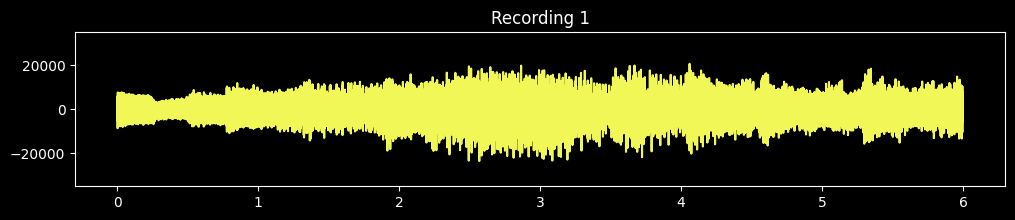

In [7]:
fs = mix_1_wave.getframerate()
timing = np.linspace(0, len(signal_1)/fs, num=len(signal_1))

plt.figure(figsize=(12,2))
plt.title('Recording 1')
plt.plot(timing,signal_1, c="#F0F757")
plt.ylim(-35000, 35000)
plt.show()

You can hear this recoding below

In the same way, we can now load the other two wave files, and hear then...

/var/folders/3x/ds4ljhhn611fn_glg6pp102h0000gq/T/ipykernel_5517/748579882.py:5: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  signal_2 = np.fromstring(signal_raw_2, 'int16')
/var/folders/3x/ds4ljhhn611fn_glg6pp102h0000gq/T/ipykernel_5517/748579882.py:12: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  signal_3 = np.fromstring(signal_raw_3, 'int16')


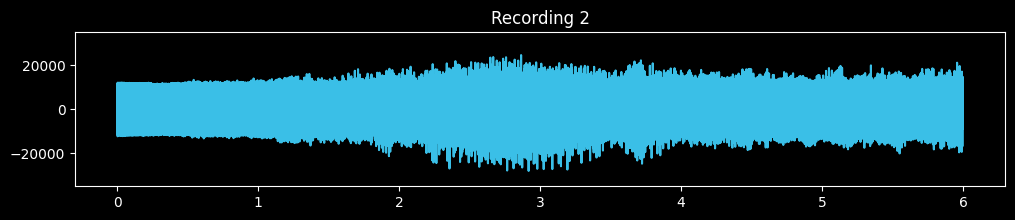

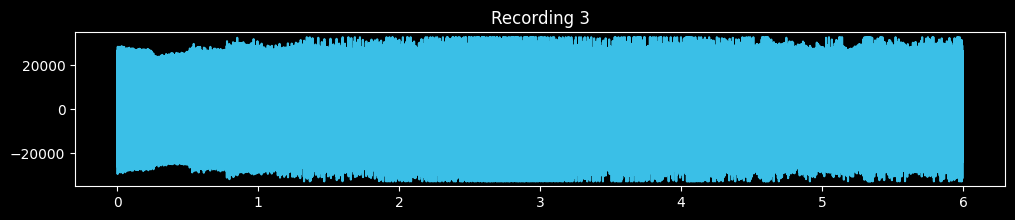

In [8]:

mix_2_wave = wave.open(my_directory+'ICA mix 2.wav','r')

#Extract Raw Audio from Wav File
signal_raw_2 = mix_2_wave.readframes(-1)
signal_2 = np.frombuffer(signal_raw_2, 'int16')


mix_3_wave = wave.open(my_directory+'ICA mix 3.wav','r')

#Extract Raw Audio from Wav File
signal_raw_3 = mix_3_wave.readframes(-1)
signal_3 = np.frombuffer(signal_raw_3, 'int16')


plt.figure(figsize=(12,2))
plt.title('Recording 2')
plt.plot(timing,signal_2, c="#3ABFE7")
plt.ylim(-35000, 35000)
plt.show()


plt.figure(figsize=(12,2))
plt.title('Recording 3')
plt.plot(timing,signal_3, c="#3ABFE7")
plt.ylim(-35000, 35000)
plt.show()


# Listening Audio

In [9]:
IPython.display.Audio(my_directory+"ICA mix 1.wav")

In [10]:
IPython.display.Audio(my_directory+"ICA mix 2.wav")

In [11]:
IPython.display.Audio(my_directory+"ICA mix 3.wav")

### So you can clearly hear that the recording seems to have multiple different recordings combined

Now that we've read all three files, we're ready to [zip](https://docs.python.org/3/library/functions.html#zip) them to create our dataset.

* Dataset ```X``` is created by zipping signal_1, signal_2, and signal_3 into a single list

In [12]:
X = list(zip(signal_1, signal_2, signal_3))

# Let's peak at what X looks like
X[:10]

[(879, 157, 879),
 (1268, 899, 2584),
 (1460, 1610, 4081),
 (1756, 2325, 5682),
 (1943, 3022, 7147),
 (2216, 3718, 8689),
 (2407, 4386, 10114),
 (2668, 5056, 11583),
 (2866, 5690, 12954),
 (3106, 6318, 14327)]

In [13]:
np.shape(X)

(264515, 3)

# Applying FastICA

We are now ready to run ICA to try to retrieve the original signals.

* We'll use sklearn's FastICA module
* Initialize FastICA look for three components and then
* Run the FastICA algorithm using fit_transform on dataset X

You can have a look at the [DOCS of FastICA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.FastICA.html)

In [14]:
from sklearn.decomposition import FastICA

# Initializing FastICA with n_components=3
ica = FastICA(n_components=3)

# Running the FastICA algorithm using fit_transform on dataset X
ica_result = ica.fit_transform(X)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


```ica_result``` now contains the result of FastICA, which we hope are the original signals. It's in the shape:

In [15]:
ica_result.shape

(264515, 3)

Let's split into separate signals and look at them

In [16]:
result_signal_1 = ica_result[:,0]
result_signal_2 = ica_result[:,1]
result_signal_3 = ica_result[:,2]

# Results

Let's plot to see how the wave forms look

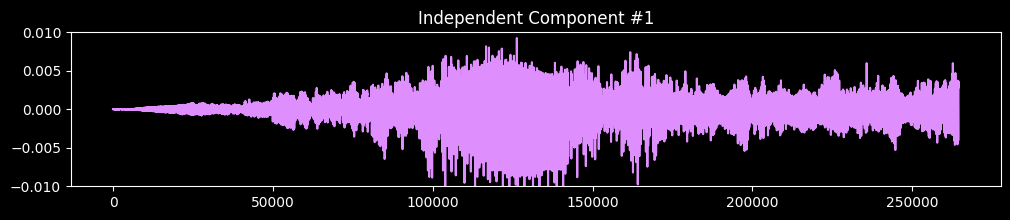

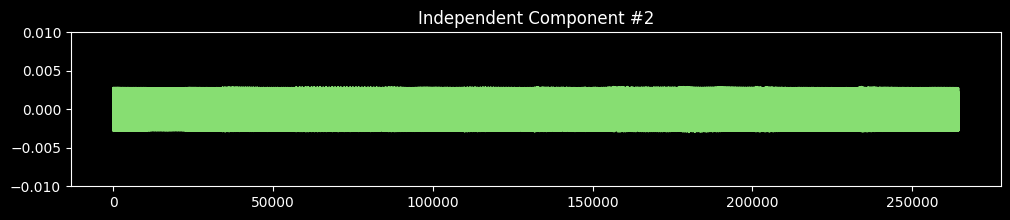

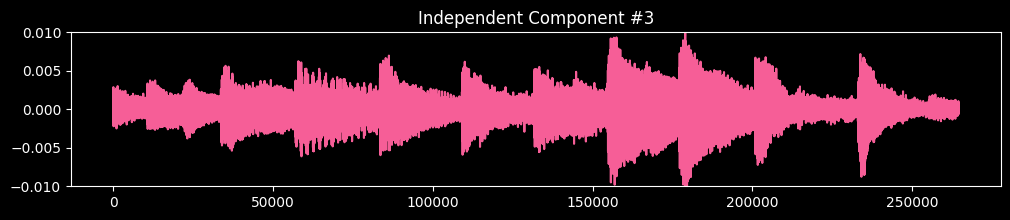

In [17]:
# Independent Component #1
plt.figure(figsize=(12,2))
plt.title('Independent Component #1')
plt.plot(result_signal_1, c="#df8efd")
plt.ylim(-0.010, 0.010)
plt.show()

# Independent Component #2
plt.figure(figsize=(12,2))
plt.title('Independent Component #2')
plt.plot(result_signal_2, c="#87de72")
plt.ylim(-0.010, 0.010)
plt.show()

# Independent Component #3
plt.figure(figsize=(12,2))
plt.title('Independent Component #3')
plt.plot(result_signal_3, c="#f65e97")
plt.ylim(-0.010, 0.010)
plt.show()



Do some of these look like musical wave forms? 

The best way to confirm the result is to listen to resulting files. So let's save as wave files and verify. But before we do that, we'll have to:
* convert them to integer (so we can save as PCM 16-bit Wave files), otherwise only some media players would be able to play them and others won't
* Map the values to the appropriate range for int16 audio. That range is between -32768 and +32767. A basic mapping can be done by multiplying by 32767.
* The sounds will be a little faint, we can increase the volume by multiplying by a value like 100

In [18]:
from scipy.io import wavfile

# Converting to int, mapping the appropriate range, and increasing the volume a little bit
result_signal_1_int = np.int16(result_signal_1*32767*100)
result_signal_2_int = np.int16(result_signal_2*32767*100)
result_signal_3_int = np.int16(result_signal_3*32767*100)


# Writing wave files
wavfile.write("result_signal_1.wav", fs, result_signal_1_int)
wavfile.write("result_signal_2.wav", fs, result_signal_2_int)
wavfile.write("result_signal_3.wav", fs, result_signal_3_int)

 **Note: make sure to lower the volume on your speakers first, just in case some problem caused the file to sound like static**
 
 The resulting files we have now are:






### This is a beautiful music piece

In [19]:
IPython.display.Audio("result_signal_1.wav")

### This is beautiful cello piece

In [20]:
IPython.display.Audio("result_signal_3.wav")

### The melody can be heard separately, but with some static noise

In [21]:
IPython.display.Audio("result_signal_2.wav")

Music:
* Piano - The Carnival of the Animals - XIII. The Swan (Solo piano version). Performer: Markus Staab
* Cello - Cello Suite no. 3 in C, BWV 1009 - I. Prelude. Performer: European Archive